<a href="https://colab.research.google.com/github/JoysgitHub/AI-COLLAB/blob/main/DECISION_TREE_IRIS_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATASET VISUALISATION: 


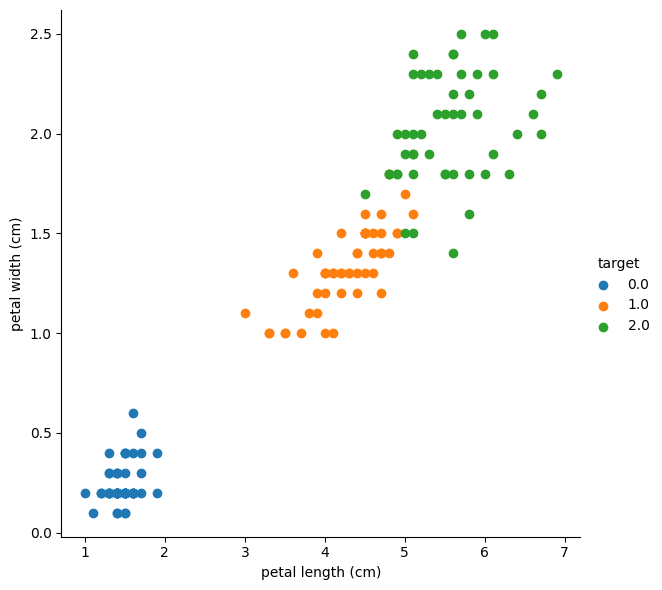

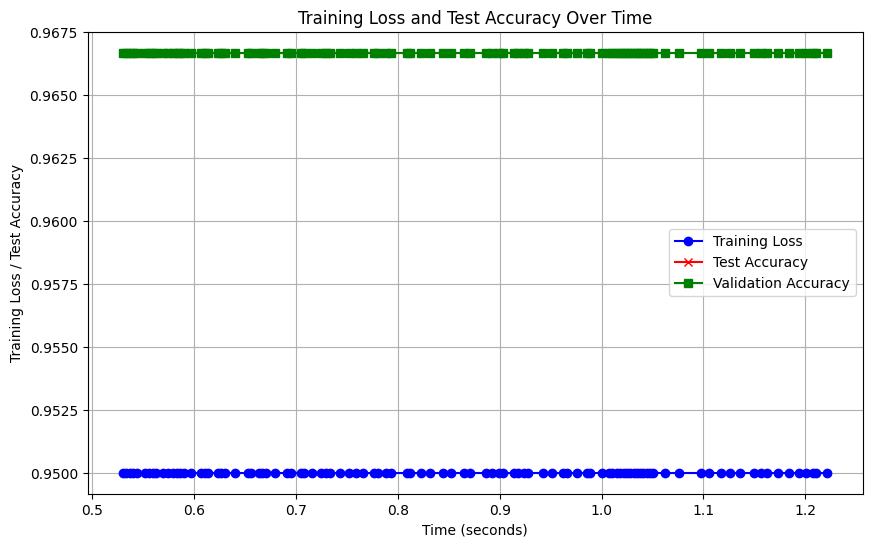

Test set accuracy: 96.67 %


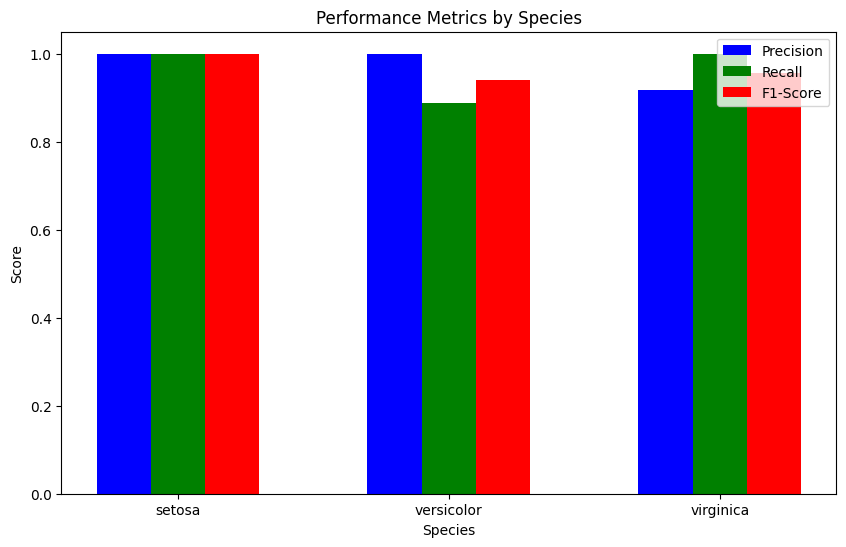

Test set accuracy: 96.67 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


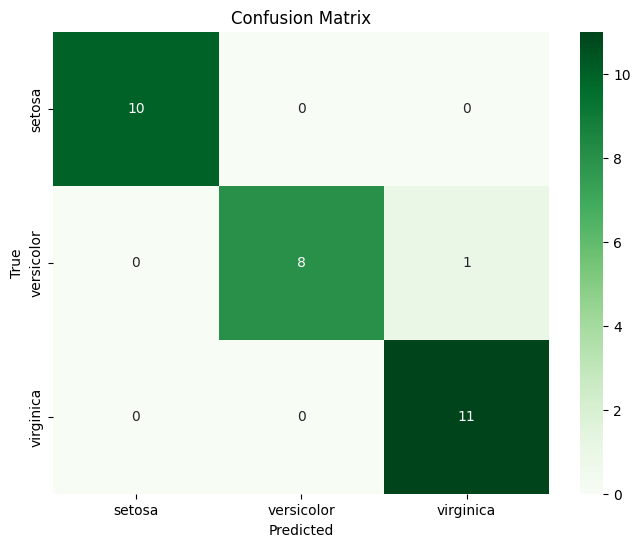

Total Execution Time: 4.05 seconds


In [ ]:
import time  # Provides time-related functions
import numpy as np  # Supports large, multi-dimensional arrays and matrices
import pandas as pd  # Offers data structures and operations for manipulating numerical tables
import matplotlib.pyplot as plt  # Allows for creating static, interactive, and animated visualizations
import seaborn as sns  # Provides a high-level interface for drawing statistical graphics
from sklearn import datasets  # Includes utilities to load datasets
from sklearn.tree import DecisionTreeClassifier  # Implements a decision tree classifier
from sklearn import metrics  # Includes performance metrics for evaluation
import warnings  # Allows for control over warning messages
from sklearn.model_selection import train_test_split  # Splits data into random train and test subsets

warnings.filterwarnings('ignore')  # Ignore warnings shown during code execution.

# Record the start time
start_time = time.time()

# Load the iris dataset into iris variable
iris = datasets.load_iris()

# Convert data to pandas dataframe
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                  columns=iris['feature_names'] + ['target'])


# Create a scatter plot graph using Seaborn
print("DATASET VISUALISATION: ")
sns.FacetGrid(df, hue="target", height=6).map(plt.scatter, "petal length (cm)", "petal width (cm)").add_legend()

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)


# Initialize a DecisionTreeClassifier object with specific hyperparameters
model = DecisionTreeClassifier(criterion="entropy", max_depth=2, min_samples_leaf=5)


# Lists to store training loss at each iteration
train_losses = []
val_losses = []
test_accuracies = []
test_time = []

# Train the decision tree classifier on the training set
for i in range(100):  # assuming 100 iterations
    model.fit(X_train, y_train)
    train_losses.append(model.score(X_train, y_train))
    val_losses.append(model.score(X_test, y_test))
    test_accuracies.append(model.score(X_test, y_test))
    time_now = time.time() - start_time
    test_time.append(time_now)

# Plotting both training loss and test accuracy over time
plt.figure(figsize=(10, 6))
plt.plot(test_time, train_losses, marker='o', color='b', label='Training Loss')
plt.plot(test_time, test_accuracies, marker='x', color='r', label='Test Accuracy')
plt.plot(test_time, val_losses , marker='s', color='g', label='Validation Accuracy')
plt.xlabel('Time (seconds)')
plt.ylabel('Training Loss / Test Accuracy')
plt.title('Training Loss and Test Accuracy Over Time')
plt.legend()
plt.grid(True)
plt.show()



# Evaluate the model on the testing set
test_accuracy = model.score(X_test, y_test)
print(f"Test set accuracy: {test_accuracy*100:.2f} %")


# The choice of criterion affects how the decision tree splits nodes (either based on Gini impurity or information gain).
# The max_depth limits the depth of the tree, controlling its complexity and preventing overfitting.

# Train the decision tree classifier on the training set
#model.fit(X_train, y_train)

predicted_test = model.predict(X_test)

# Calculate precision, recall, and F1-score for each class
precision, recall, f1_score, _ = metrics.precision_recall_fscore_support(y_test, predicted_test, average=None)


# Create a bar plot showing precision, recall, and F1-score for each class
plt.figure(figsize=(10, 6))
x = np.arange(len(iris.target_names))
bar_width = 0.2

plt.bar(x, precision, width=bar_width, label='Precision', color='b')
plt.bar(x + bar_width, recall, width=bar_width, label='Recall', color='g')
plt.bar(x + 2 * bar_width, f1_score, width=bar_width, label='F1-Score', color='r')

plt.xlabel('Species')
plt.ylabel('Score')
plt.title('Performance Metrics by Species')
plt.xticks(x + bar_width, iris.target_names)
plt.legend()
plt.show()
# Evaluate the model on the testing set
test_accuracy = model.score(X_test, y_test)
print(f"Test set accuracy: {test_accuracy*100:.2f} %")

# Make predictions on the test set
predicted_test = model.predict(X_test)
print(metrics.classification_report(y_test, predicted_test))

# Calculate and print the confusion matrix for the test set
conf_matrix_test = metrics.confusion_matrix(y_test, predicted_test)


# Plot the confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Greens', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Record the end time
end_time = time.time()

# Calculate the total execution time
execution_time = end_time - start_time
print("Total Execution Time: {:.2f} seconds".format(execution_time))

# Create a time vs accuracy graph
#plt.figure(figsize=(10, 6))
#plt.plot(execution_time, test_accuracy, marker='o', color='b')
#plt.xlabel('Execution Time (seconds)')
#plt.ylabel('Test Accuracy')
#plt.title('Execution Time vs Test Accuracy')
#plt.grid(True)
#plt.show()

